<a href="https://colab.research.google.com/github/shilpamatne/FDP_AdiSankara/blob/main/6_1_Transfer_Learning.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

##https://github.com/shilpamatne/FDP_AdiSankara.git

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [10]:
import tensorflow as tf
print(tf.__version__)

from tensorflow import keras
tf.random.set_seed(42)

import numpy as np
np.random.seed(42)

import matplotlib.pyplot as plt
%matplotlib inline

import glob
import PIL
from PIL import Image

2.9.2


In [2]:

! unzip '/content/drive/MyDrive/Flower_dataset.zip' -d '/content/Flower_dataset/'

Archive:  /content/drive/MyDrive/Flower_dataset.zip
   creating: /content/Flower_dataset/tiny_FR/
   creating: /content/Flower_dataset/tiny_FR/daisy/
  inflating: /content/Flower_dataset/tiny_FR/daisy/100080576_f52e8ee070_n.jpg  
  inflating: /content/Flower_dataset/tiny_FR/daisy/102841525_bd6628ae3c.jpg  
  inflating: /content/Flower_dataset/tiny_FR/daisy/1031799732_e7f4008c03.jpg  
  inflating: /content/Flower_dataset/tiny_FR/daisy/105806915_a9c13e2106_n.jpg  
  inflating: /content/Flower_dataset/tiny_FR/daisy/107592979_aaa9cdfe78_m.jpg  
  inflating: /content/Flower_dataset/tiny_FR/daisy/1140299375_3aa7024466.jpg  
  inflating: /content/Flower_dataset/tiny_FR/daisy/1150395827_6f94a5c6e4_n.jpg  
  inflating: /content/Flower_dataset/tiny_FR/daisy/11642632_1e7627a2cc.jpg  
  inflating: /content/Flower_dataset/tiny_FR/daisy/1265350143_6e2b276ec9.jpg  
  inflating: /content/Flower_dataset/tiny_FR/daisy/1285423653_18926dc2c8_n.jpg  
  inflating: /content/Flower_dataset/tiny_FR/daisy/12862

In [11]:
imgFiles = glob.glob("/content/Flower_dataset/tiny_FR/*/*.jpg") #navigate through sub-folders, parses them and store in a list
for items in imgFiles[:8]: #imgFiles is a list of strings, each string corresponds to the file path 
  print(items)

/content/Flower_dataset/tiny_FR/tulip/497305666_b5d4348826_n.jpg
/content/Flower_dataset/tiny_FR/tulip/2256214682_130c01d9d9.jpg
/content/Flower_dataset/tiny_FR/tulip/38287568_627de6ca20.jpg
/content/Flower_dataset/tiny_FR/tulip/112334842_3ecf7585dd.jpg
/content/Flower_dataset/tiny_FR/tulip/2294116183_a30d2aa2c1_m.jpg
/content/Flower_dataset/tiny_FR/tulip/503770507_f397245a6a.jpg
/content/Flower_dataset/tiny_FR/tulip/2249756775_02e693beda_n.jpg
/content/Flower_dataset/tiny_FR/tulip/11746080_963537acdc.jpg


In [12]:
print(len(imgFiles))

500


In [13]:
X = []
y = []

for fName in imgFiles:
  
  # Prepare the dataset and populate X and y
  X_i = Image.open(fName) # tiny_FR/sunflower/1715303025_e7065327e2.jpg (500, 333)
  X_i = X_i.resize((299,299)) # To make them approriate to Xception model when using Transfer Learning 
  X_i = np.array(X_i) / 255.0 # Normalize to range 0.0 to 1.0 
  X.append(X_i)

  label = fName.split("/") # ['tiny_FR', 'sunflower', '1715303025_e7065327e2.jpg'], list containing substrings
  y_i = label[-2] # 'sunflower'
 
  y.append(y_i)

#processed all  image files and corresponding intensity values and labels stored in X and y respectively 


In [14]:
print(set(y)) # python function that lists unique values in the list. # these are string labels

# but the network can only deal with numeric data.  

{'rose', 'dandelion', 'sunflower', 'daisy', 'tulip'}


In [15]:
from sklearn.preprocessing import LabelEncoder
lEncoder = LabelEncoder()
y = lEncoder.fit_transform(y)
print(set(y))

print(lEncoder.classes_) #classes_ is a member variable in the class


{0, 1, 2, 3, 4}
['daisy' 'dandelion' 'rose' 'sunflower' 'tulip']


In [16]:
  
X = np.array(X)
y = np.array(y)

print(X.shape)
print(y.shape)


(500, 299, 299, 3)
(500,)


In [17]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, 
                                                    stratify=y, random_state=42)

print("X_train_shape: {}".format(X_train.shape))
print("X_test_shape: {}".format(X_test.shape))

X_train_shape: (400, 299, 299, 3)
X_test_shape: (100, 299, 299, 3)



#Pretrained models require 3-channel data as input
  If using grayscale (1-channel), make the following conversion:

   
*    X_train = tf.image.grayscale_to_rgb(tf.convert_to_tensor(X_train))

*    X_test = tf.image.grayscale_to_rgb(tf.convert_to_tensor(X_test))


*   print(X_train.shape)






   

   

In [18]:
#standard scaling 
mu = X_train.mean()
std = X_train.std()

X_train_std = (X_train-mu)/std
X_test_std = (X_test-mu)/std

#Keras Applications

https://keras.io/api/applications/

91884032/91884032 [==============================] - 5s 0us/step


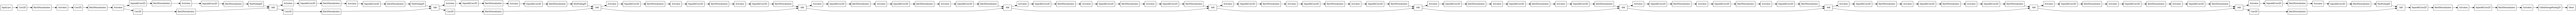

In [19]:
# Retrieve the Xception model from Keras
#view the entire model  
Xception_model = keras.applications.Xception()

tf.keras.utils.plot_model(
    Xception_model,
    to_file='Xmodel.png',
    show_shapes=False,
    show_layer_names=False,
    rankdir='LR',
    expand_nested=False,
    dpi=96
)

#For transfer learning


*   include_top=False
*   weights = 'imagenet



In [ ]:
#https://keras.io/api/applications/

83683744/83683744 [==============================] - 4s 0us/step


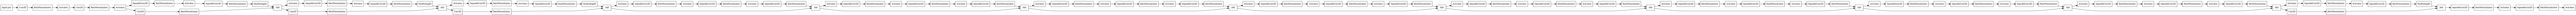

In [20]:
# Take only the feature extractor part

base_model = keras.applications.Xception(weights='imagenet', 
                                                  include_top=False)

# Visualize the extractor part for transfer learning

tf.keras.utils.plot_model(
    base_model,
    to_file='baseModel.png',
    show_shapes=False,
    show_layer_names=False,
    rankdir='LR',
    expand_nested=False,
    dpi=96
)

In [21]:
# Make the weights/parameters of fetaure extractor non-trainable
# Freeze the weights - will not be updated during backpropagation
for layer in base_model.layers:
  layer.trainabe = False


#Add classifier part


*   Global Average Pooling - 2D
*   Output layer (5 units (because 5-class classificaiton problem)



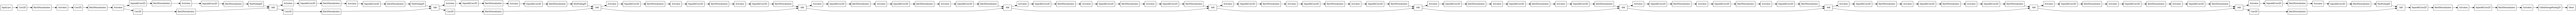

In [22]:
# Adding classifier
#Inspect how flattening is made in the pretrained model. In Xception, they use GAP
global_pool = keras.layers.GlobalAveragePooling2D()(base_model.output)

output_ = keras.layers.Dense(units=5, activation='softmax')(global_pool)

model_TL = keras.models.Model(inputs=[base_model.input], outputs=[output_])

# Visualize the complete model
tf.keras.utils.plot_model(
    model_TL,
    to_file='Model_TL.png',
    show_shapes=False,
    show_layer_names=False,
    rankdir='LR',
    expand_nested=False,
    dpi=96
)

#Compile and train the model

##Save the best weights while training

https://www.tensorflow.org/api_docs/python/tf/keras/callbacks/ModelCheckpoint


In [23]:
model_TL.compile(loss='sparse_categorical_crossentropy', 
                 optimizer='adam', 
                 metrics=['accuracy'])
#introduce callbacks to save the best model


callbacks_TL = [            
             keras.callbacks.ModelCheckpoint("bestTL.h5",
                                             monitor='val_accuracy',verbose=1,
                                             save_weights_only=True,
                                             save_best_only=True)]


history_TL = model_TL.fit(x = X_train_std, y = y_train, epochs=50, 
                          validation_split=0.1, batch_size=16, callbacks=callbacks_TL)

Epoch 1/50
23/23 [==============================] - ETA: 0s - loss: 0.6822 - accuracy: 0.7417
Epoch 1: val_accuracy improved from -inf to 0.47500, saving model to bestTL.h5
23/23 [==============================] - 28s 625ms/step - loss: 0.6822 - accuracy: 0.7417 - val_loss: 5.7484 - val_accuracy: 0.4750
Epoch 2/50
23/23 [==============================] - ETA: 0s - loss: 0.4130 - accuracy: 0.8806
Epoch 2: val_accuracy improved from 0.47500 to 0.55000, saving model to bestTL.h5
23/23 [==============================] - 13s 550ms/step - loss: 0.4130 - accuracy: 0.8806 - val_loss: 11.8573 - val_accuracy: 0.5500
Epoch 3/50
23/23 [==============================] - ETA: 0s - loss: 0.3438 - accuracy: 0.8889
Epoch 3: val_accuracy did not improve from 0.55000
23/23 [==============================] - 13s 547ms/step - loss: 0.3438 - accuracy: 0.8889 - val_loss: 16.5959 - val_accuracy: 0.4000
Epoch 4/50
23/23 [==============================] - ETA: 0s - loss: 0.2295 - accuracy: 0.9472
Epoch 4: val_a

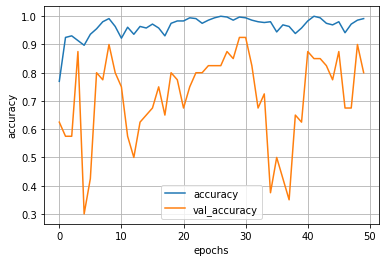

In [ ]:
keys = ['accuracy', 'val_accuracy']
progress = {k:v for k,v in history_TL.history.items() if k in keys}

import pandas as pd
pd.DataFrame(progress).plot()

plt.xlabel("epochs")
plt.ylabel("accuracy")

plt.grid(True)
plt.show()

In [ ]:
#Evaluate the model 

testLoss_TL, testAccuracy_TL = model_TL.evaluate(x = X_test_std, y = y_test)
print("Test-loss: %f, Test-accuracy: %f" % (testLoss_TL, testAccuracy_TL))

4/4 [==============================] - 3s 302ms/step - loss: 0.9722 - accuracy: 0.7800
Test-loss: 0.972170, Test-accuracy: 0.780000


#Update the model with best weights


*  These weights may be from an intermediate epoch



In [ ]:
model_TL.load_weights("bestTL.h5")

testLoss_TL, testAccuracy_TL = model_TL.evaluate(x = X_test_std, y = y_test)

print("Test-loss: %f, Test-accuracy: %f" % (testLoss_TL, testAccuracy_TL))

4/4 [==============================] - 1s 180ms/step - loss: 0.7995 - accuracy: 0.8700
Test-loss: 0.799542, Test-accuracy: 0.870000


#Save the model & dataset(for finetuning)

In [ ]:
# Saves the best model obtained in drive( if not saved in drive)
model_TL.save('/content/drive/MyDrive/Models/01_Xception_TransferLearning_Best_Model.h5')

In [ ]:
from numpy import save
#.npy is numpy array format 
save('/content/drive/MyDrive/Models/X_train_std.npy', X_train_std)
save('/content/drive/MyDrive/Models/X_test_std.npy', X_test_std)

save('/content/drive/MyDrive/Models/y_train.npy', y_train)
save('/content/drive/MyDrive/Models/y_test.npy', y_test)